# Предсказание курса биткоина с помощью линейной регрессии

In [137]:
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error

In [197]:
data = pd.read_csv("https://raw.githubusercontent.com/aiedu-courses/stepik_applied_tasks/main/datasets/BTC_5min_sample.csv",
                   parse_dates=True, index_col='timestamp')

In [198]:
data = data[['open']]

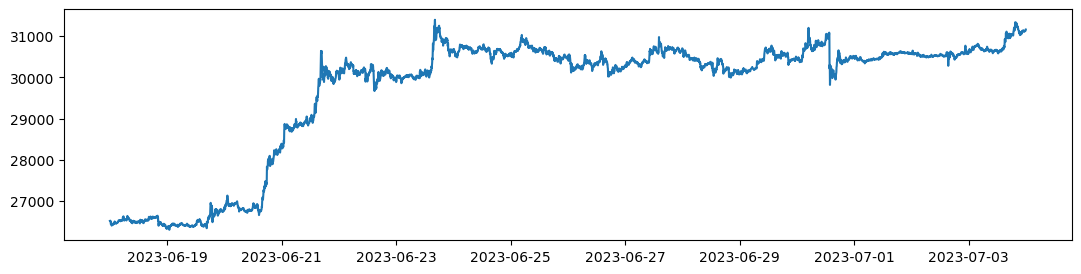

In [199]:
plt.figure(figsize=(13, 3))
plt.plot(data)

In [206]:
def preprosses_data(data, lag_start=1, lag_end=10, test_size=0.15):

    for i in range(lag_start, lag_end):
        data[f'lag_{i}'] = data['open'].shift(i)
    data = data.dropna()

    data['day'] = data.index.weekday
    # data['hour'] = data.index.hour

    # data['mean_day'] = data.groupby('day').open.mean()
    # data['mean_hour'] = data.groupby('hour').open.mean()

    # data = data.drop(['day', 'hour'], axis=1)

    X = data.drop('open', axis=1)
    y = data['open']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)
    
    
    return X_train, X_test, y_train, y_test

In [207]:
X_train, X_test, y_train, y_test = preprosses_data(data)

C:\Users\Руслан\AppData\Local\Temp\ipykernel_6484\2890686097.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['day'] = data.index.weekday


In [208]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [209]:
predict = pd.Series(lr.predict(X_test), index=y_test.index)


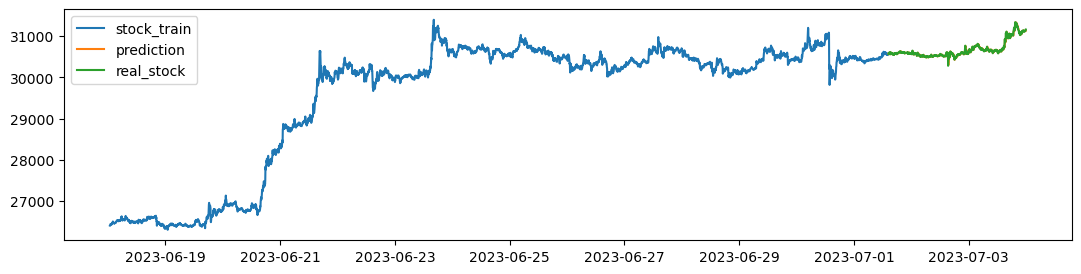

In [210]:
plt.figure(figsize=(13, 3))
plt.plot(y_train, label='stock_train')
plt.plot(predict, label='prediction')
plt.plot(y_test, label='real_stock')
plt.legend()

Text(0.5, 1.0, 'MAE: 16.279653514291226\nPercantages: 0.0005')

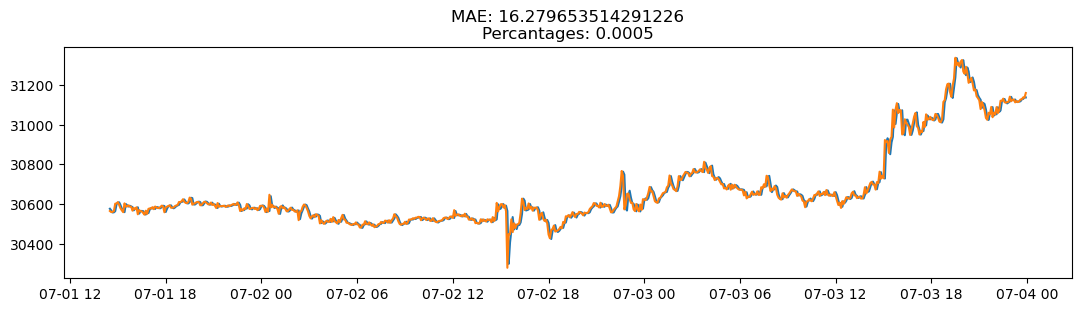

In [211]:
plt.figure(figsize=(13, 3))
plt.plot(predict, label='prediction')
plt.plot(y_test, label='real_stock')
plt.title(f'MAE: {mean_absolute_error(y_test, predict)}\nPercantages: {mean_absolute_percentage_error(predict, y_test):.4f}')